# Machine Learning 401

## Gradient Boosting Machines 

* AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
* Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
* Oluşturulan ağaçların ürettiği sonuçların üzerinden yeni ağaçlar oluştururlur.

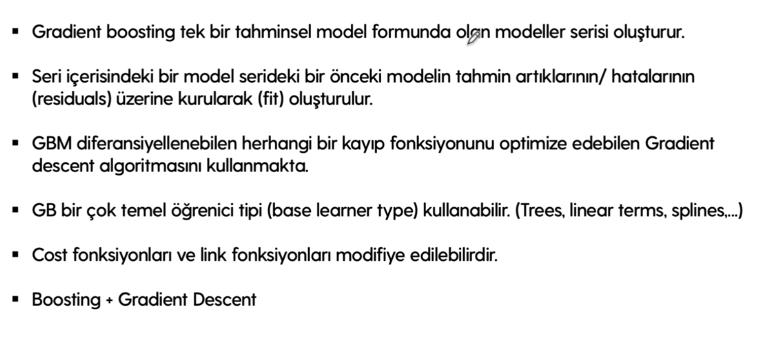

### Model ve Tahmin 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_auc_score, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [4]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [5]:
gbm_model

GradientBoostingClassifier()

In [6]:
# n_estimators = kullanıalcak ağaç sayısıdır
# criterion bölnmelere karar vericek kriterlerdir.
# min_sample_split bölnme için gerekli olan min örnek sayısı

In [8]:
y_pred = gbm_model.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.7489177489177489

### Model Tuning 

In [10]:
gbm = GradientBoostingClassifier()

In [11]:
gbm_params = {"learning_rate" : [0.1, 0.01, 0.001, 0.005],
             "n_estimators" : [100,300,500,1000],
             "max_depth" : [2,3,5,8]}

In [12]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [13]:
gbm_cv_model.best_params_

{'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}

In [14]:
# final modeli

In [15]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.005, max_depth = 5,n_estimators = 1000).fit(X_train, y_train)

In [16]:
y_pred = gbm_tuned.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [18]:
#değişken önem düzeyi

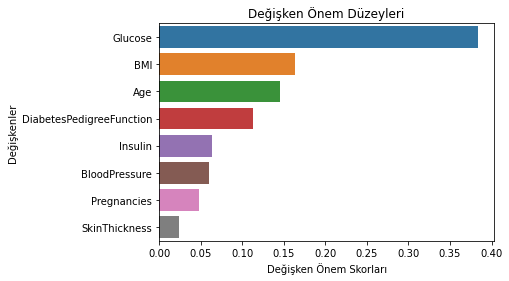

In [20]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                       index = X_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y= feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()